In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from scipy.stats import norm
import seaborn as sns


Various plot for Visualization

### Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


### Categorical: 

1. Pie chart

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries 

In [119]:
hr=pd.read_csv('heart.csv')

### 1.2 import the dataset ? (1 mark)

In [120]:
hr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.3 How to see the size of your data? (1 mark)

In [121]:
hr.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?  (1 mark)

In [122]:
hr.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5  a How to see just one column?

In [123]:
hr['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### 1.5 b How to check the column names? (1 mark)

In [124]:
hr.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.5 c Find the Numerical Features,Categorical Features, Alphanumeric Features?  (1 mark)

In [125]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Change the column names?

In [126]:
#Change the sex(0,1)=(female,male)
hr['sex'] = hr['sex'].replace({0:'female',1:'male'})
hr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1.6 Quantitative:   ( 5 marks)

### 1.6 a) Create kdeplot for showing age

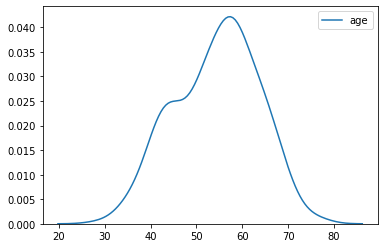

In [127]:
sns.kdeplot(hr.age)
plt.show()

### 1.6 a) Create histogram for showing cholestrol with Number of bins 5

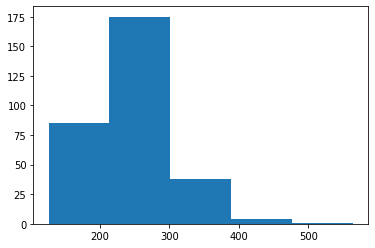

In [128]:
plt.hist(hr.chol, bins = 5)
plt.show()

### 1.6 c) Create Boxplot for showing trestbps and comment what the dark spot indicate

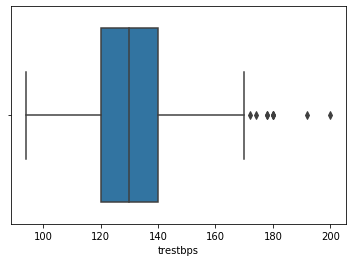

In [129]:
sns.boxplot(hr.trestbps)
plt.show()

 The darkspot outside the boxplot indicate the outlers where as the centre line of boxplot indicate median

##  Categorical vs. Quantitative  (10 Marks)

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

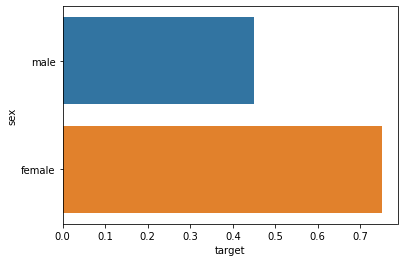

0    55.072464
1    44.927536
Name: target, dtype: float64

In [130]:

#draw a bar plot of target by sex

sns.barplot( x='target',
    y='sex',
    hue=None,
    data=hr,
    ci=0)
plt.show()
#print percentages of females vs. males Heart Disease
hr['target'][hr.sex=='female'].value_counts(normalize=True)*100
hr['target'][hr.sex=='male'].value_counts(normalize=True)*100

### Observation:
We can clear see that female are suffering  more by heart disease then Male 


### 1.8b) Create Bar plot for checking the both target vs Sex.

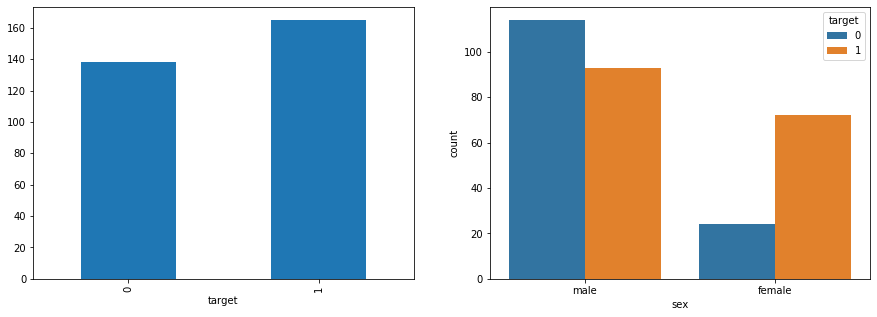

In [131]:
#create a subplot

fig,a=plt.subplots(1,2,figsize=(15,5))
# create bar plot using groupby
hr.groupby(['target']).count()['sex'].plot(kind='bar',ax=a[0])

# create count plot
sns.countplot(x='sex',data=hr,hue='target',ax=a[1])
plt.show()

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not.

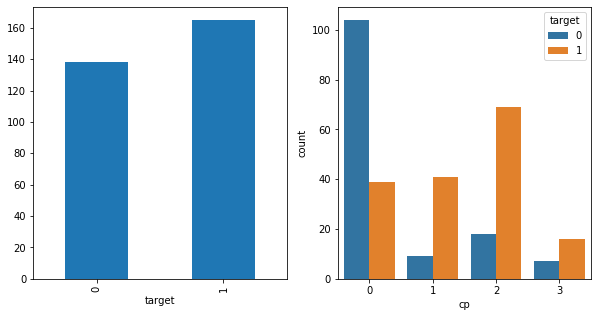

In [132]:
# create subplot plot
fig ,a=plt.subplots(1,2,figsize=(10,5))
# create bar plot using groupby

hr.groupby(['target']).count()['cp'].plot(kind='bar',ax=a[0])

# create count plot
# create count plot
sns.countplot(x='cp',data=hr,hue='target',ax=a[1])
plt.show()

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'

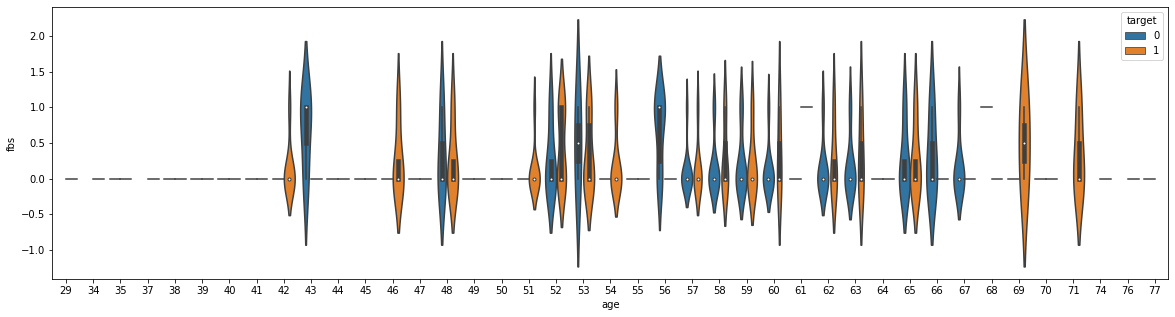

In [133]:
# create subplot plot

fig,a=plt.subplots(figsize=(20,5))
# create violinplot plot using groupby

g1=hr.groupby(['fbs']).count()['age']

sns.violinplot(x='age',y='fbs',hue='target',data=hr)
plt.show()


## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age 

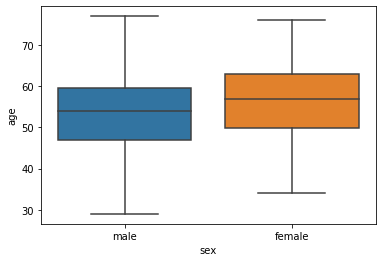

In [134]:
# create boxplot
sns.boxplot(x='sex',y='age',data=hr)
plt.show()

# 1.9 Categorical vs. Categorical (3 marks)

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex

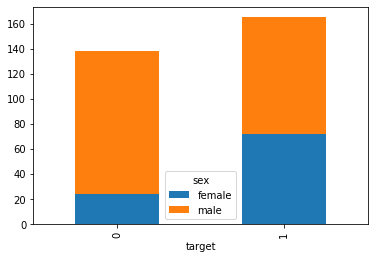

In [135]:
#create crosstab

pd.crosstab(hr['target'],hr['sex']).plot(kind='bar',stacked=True)
plt.show()


# 1.10 Quantitative vs. Quantitative ( 2 marks)

### 1.10a) Create a scatter plot for showing age & st_depression

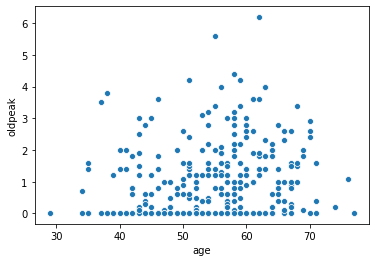

In [137]:
sns.scatterplot(hr['age'],hr['oldpeak'])
plt.show()

# Overall  Observation    ( 5 marks):
   

1. We can see the age is group if varrying from 20 to 80 years and also two dome which mean data is not normal.
2. Majority of the cases are having cholestrol between the range of 200-300  while very few cases have between 400-600.
3. We can clear see that female are suffering  more by heart disease then Male.
4.Allthough here the case of heart disease are more in chest pain  type 0 but critical condn are observe in type 2.
5.Most of the cases are with female consider there age as the one factor which means femle suffer it more at early age then male. 

# THE END